# CardioGoodFitness 

- For each treadmill product provided by CardioGood Fitness, the market analysis team at AdRight is assigned the task of determining the profile of the typical client. 
- The market research team decides to analyze whether there are variations with regard to consumer characteristics across the product lines.
- During the previous three months, the team wanted to gather data on people who bought a treadmill at a CardioGoodFitness retail store.
- The data are stored in the CardioGoodFitness.csv file
- Data Source: https://www.kaggle.com/saurav9786/cardiogoodfitness



## Attribute Information:

The team identifies the following customer variables to study:
1. product purchased (TM195, TM498, or TM798)
2. gender
3. age (in years)
4. education (in years)
5. relationship status (single or partnered)
6. annual household income ($)
7. average number of times the customer plans to use the treadmill each week
8. average number of miles the customer expects to walk/run each week
9. self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape 

## Objective 
Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

## Libraries used

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

## Loaded and Visualize Dataset

In [2]:
# Imput the dataset
data = pd.read_csv(r'C:\Users\fjiac\Desktop\Projects\GitHub\CardioGoodFitness.csv')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [3]:
# Checking the data type(info)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
Product          180 non-null object
Age              180 non-null int64
Gender           180 non-null object
Education        180 non-null int64
MaritalStatus    180 non-null object
Usage            180 non-null int64
Fitness          180 non-null int64
Income           180 non-null int64
Miles            180 non-null int64
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
# Checking the number of columns and rows
data.shape

(180, 9)

In [5]:
# Checking if there is any missing values
data.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

## Histogram
By constructing bins along the data set, this histogram shows the distribution of data. We then draw the bars to indicate the number of observations that fell in each bin.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002315D78B4C8>,
      dtype=object)

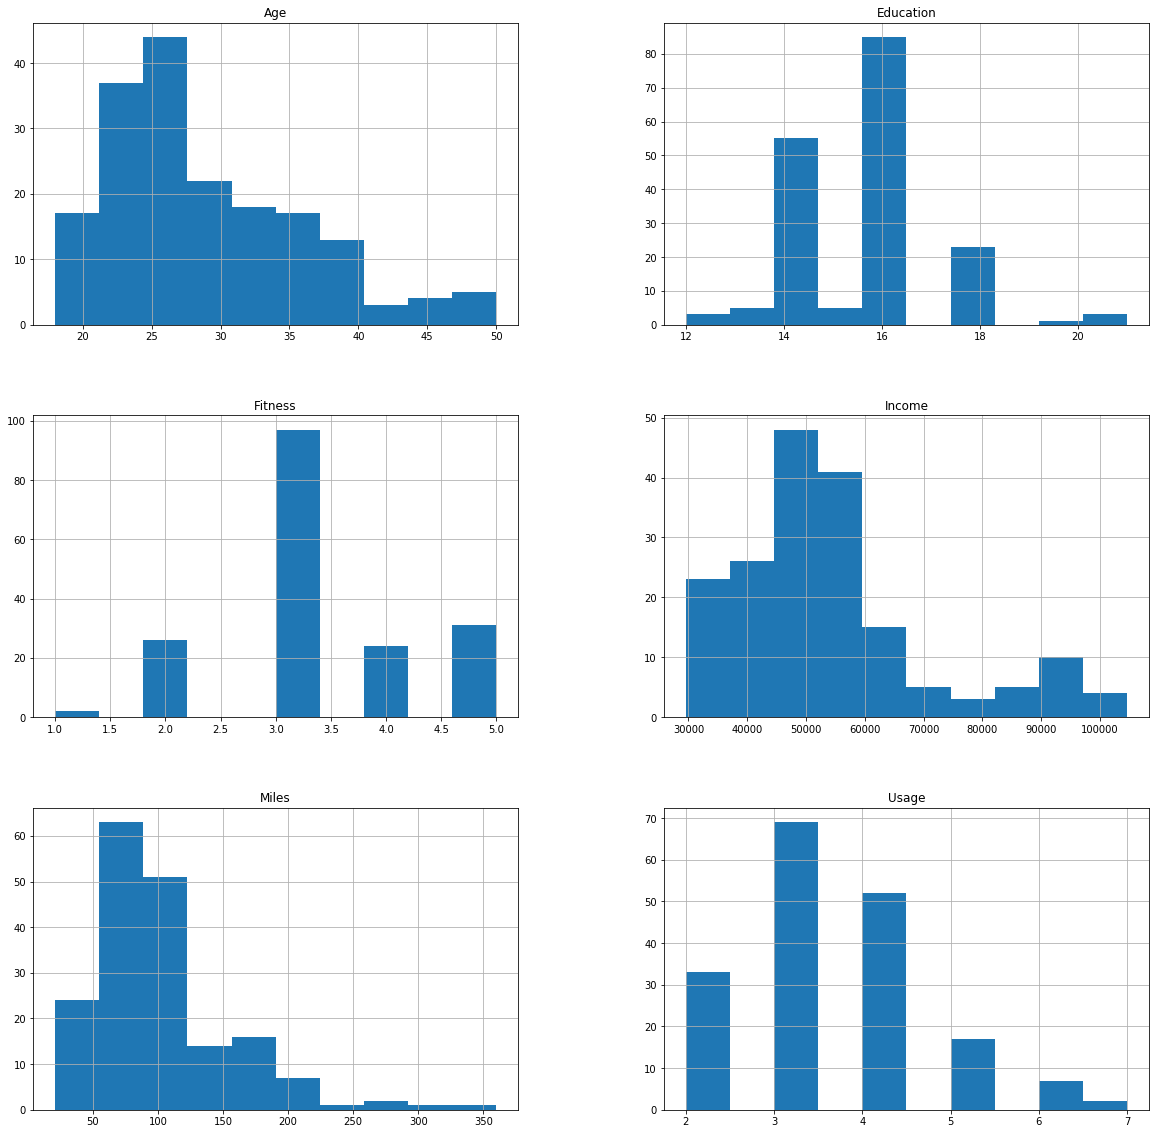

In [6]:
data.hist(figsize=(20,20))

From the histogram above, we can clearly see that the "Age", "Miles", "Income", and "Usage" variables are having right skewed(positive skewed) while "Education" and "Fitness" can be considered as having normal distribution based on the distribution of each columns.

## Boxplots

We now want to find out which products have the most puchased(by gender).

In [7]:
pd.crosstab(data['Product'], data['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('Male', 'TM195'),
               (0.0, 0.0, 0.5749032614704257, 0.3820682628629648)),
              (('Male', 'TM498'),
               (0.0,
                0.3853795211411105,
                0.5749032614704257,
                0.2961029037187977)),
              (('Male', 'TM798'),
               (0.0,
                0.684793683138054,
                0.5749032614704257,
                0.31520631686194595)),
              (('Female', 'TM195'),
               (0.5798783858485351,
                0.0,
                0.420121614151465,
                0.5228302544440571)),
              (('Female', 'TM498'),
               (0.5798783858485351,
                0.5261415127222027,
                0.420121614151465,
                0.37905193447194147)),
              (('Female', 'TM798'),
               (0.5798783858485351,
                0.9085047054722899,
                0.420121614151465,
                0.09149529452770995))]))

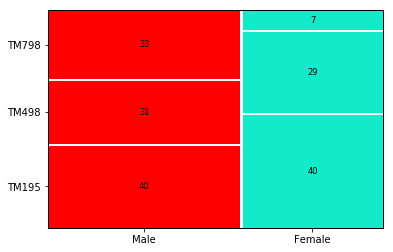

In [11]:
# properties is used to fix the color
props = {}
props[('Male', 'TM195')] = {'facecolor': 'red', 'edgecolor':'white'}
props[('Male', 'TM498')] = {'facecolor': 'red', 'edgecolor':'white'}
props[('Male', 'TM798')] = {'facecolor': 'red', 'edgecolor':'white'}

props[('Female', 'TM195')] = {'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Female', 'TM498')] = {'facecolor':'xkcd:aqua','edgecolor':'white'}
props[('Female', 'TM798')] = {'facecolor':'xkcd:aqua','edgecolor':'white'}

# give label and count number in a plot
labelizer=lambda k:{('Male','TM195'):40,('Female','TM195'):40,('Male','TM498'):31,('Female','TM498'):29, ('Male','TM798'):33, ('Female','TM798'):7}[k]

mosaic(data,['Gender','Product'], labelizer=labelizer, properties=props)

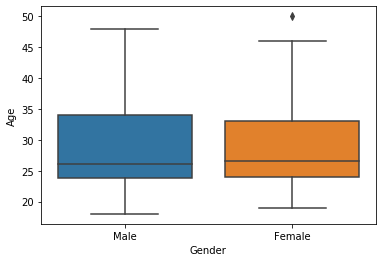

In [8]:
sns.boxplot(x = 'Gender', y = 'Age', data = data)

### Comment on boxplot
Both Male and Female having almost the same median, however, female do comtain